In [ ]:
import matplotlib.pyplot as plt
import numpy as np

The Heston Stochastic Volatility model assumes a square root mean reverting process for the spot volatility of an asset. It models the dynamics of asset as

d$S_{t}$= $μ_{t}$$S_{t}$ + $\sqrt{v_{t}}$$S_{t}$$dW_{1,t}$

d$v_{t}$=κ(θ - $v_{t}$)dt + σ$\sqrt{v_{t}}$$dW_{2,t}$

cov($dW_{1,t}$, $dW_{2,t}$)=ρ

We will initially try to simulate this process through Monte Carlo methods.

We will attack this stochastic differential equation via the Millstein scheme.

$v_{t+dt}$= $(\sqrt{v_{t}} + 0.5*σ\sqrt{dt}$$Z_{v})^{2}$ + κ(θ-$v_{t}$)dt - 0.25*$σ^{2}$dt

$S_{t+dt}$= $S_{t}$.$e^{(r - 0.5*v_{t})dt + \sqrt{v_{t}dt}Z_{s}}$

$Z_{1}$ and $Z_{2}$ are two independent standard normal.

Set: $Z_{v}$ = $Z_{1}$
<br>
 $Z_{s}$ = ρ$Z_{1}$ + $\sqrt{1- ρ^{2}}Z_{2}$

In [ ]:
# Parameters
# simulation dependent
S0 = 100.0             # asset price
T = 1.0                # time in years
r = 0.02               # risk-free rate
N = 252                # number of time steps in simulation
M = 1000               # number of simulations

# Heston dependent parameters
kappa = 3              # rate of mean reversion of variance under risk-neutral dynamics
theta = 0.20**2        # long-term mean of variance under risk-neutral dynamics
v0 = 0.25**2           # initial variance under risk-neutral dynamics
rho = 0.7              # correlation between returns and variances under risk-neutral dynamics
sigma = 0.6            # volatility of volatility


(0.04000000000000001, 0.0625)

In [ ]:
def heston_monte_carlo(S0,T,r,N,M,kappa,theta,v0,rho,sigma):
    dt = T/N

    mu = np.array([0,0])
    cov = np.array([[1,rho],
                    [rho,1]])

    S = np.full(shape=(N+1,M),fill_value=S0)
    v = np.full(shape=(N+1,M),fill_value=v0)

    Z = np.random.multivariate_normal(mu, cov, (N,M))

    for i in range(1,N+1):
        S[i]=S[i-1]* np.exp((r- 0.5 * v[i-1])*dt + np.sqrt(v[i-1]*dt)*Z[i-1,:,0])
        v[i]= (np.sqrt(v[i-1]) + 0.5*sigma*np.sqrt(dt))*Z[i-1,:,1] + kappa*(theta - v[i-1])*dt - 0.25*sigma**2*dt
        v[i]=np.maximum(v[i],np.zeros(shape=(1,M))) #full truncation scheme to avoid problem of negative volatility

    return S,v

In [ ]:
rho_p=0.7
rho_n=0.2

In [ ]:
S_p,v_p=heston_monte_carlo(S0,T,r,N,M,kappa,theta,v0,rho_p,sigma)
S_n,v_n=heston_monte_carlo(S0,T,r,N,M,kappa,theta,v0,rho_n,sigma)

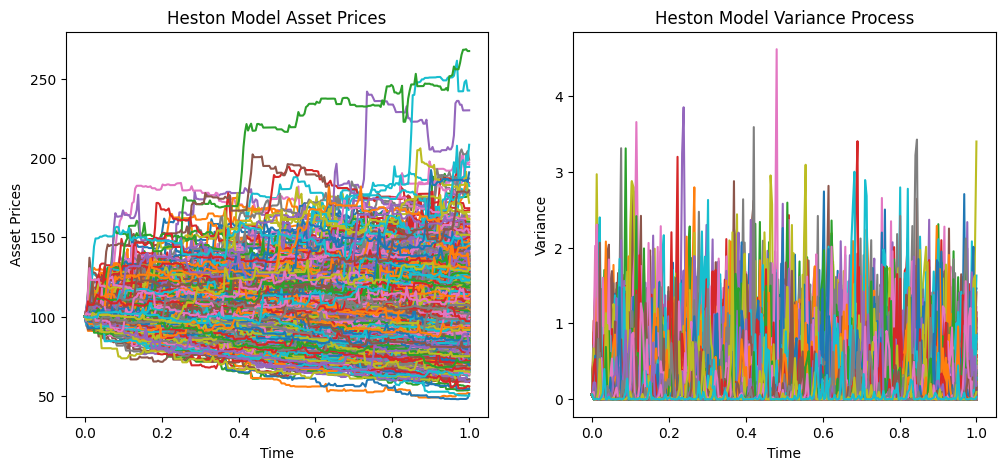

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,5))
time = np.linspace(0,T,N+1)
ax1.plot(time,S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Prices')

ax2.plot(time,v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')

plt.show()